# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training VGG16 with ADAMAX optimizer for VEIL requisite',
        'tags': ['vgg16', 'ground truths', 'adamax', 'veil'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                      DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                      DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                      DLName.GENKI4K_DB
#                     ],
        'req': cts.ICAO_REQ.VEIL,
        'aligned': True,
        'use_gt_data': True,
        'gt_names': [GTName.IMFD, GTName.IM_SEARCH, GTName.CMFD, GTName.FVC],
        'balance_input_data': False,
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 20,
        'early_stopping': 10,
        'shuffle': True,
        'dense_units': 128,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAGRAD,
        'dropout': 0.5,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training VGG16 with ADAMAX optimizer for VEIL '
                               'requisite',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16', 'ground truths', 'adamax', 'veil']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f124b94c940>}>,
                      'batch_size': 64,
                      'dense_units': 128,
                      'dropout': 0.5,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 20,
                      'optimizer': <Optimizer.ADAGRAD: 'Adagrad'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
                      'validation_prop': 0.05,
             

# Load Data

In [4]:
trainer.load_training_data()

Loading data
len(files_list_train):  5210
len(files_list_val):  570
labels_train.shape: (5210,23)
labels_val.shape: (570,23)
-- GT: GTName.FVC --
Ground Thruth shape:  (5780, 23)
..Ignoring 0 dummy and empty label values
len(files_list_train):  1983
labels_train.shape: (1983, 1)
-- GT: GTName.IMFD --
Ground Thruth shape:  (1983, 1)
..Ignoring 0 dummy and empty label values
len(files_list_train):  925
labels_train.shape: (925, 1)
-- GT: GTName.CMFD --
Ground Thruth shape:  (925, 1)
..Ignoring 0 dummy and empty label values
len(files_list_train):  401
labels_train.shape: (401, 1)
-- GT: GTName.IM_SEARCH --
Ground Thruth shape:  (401, 1)
..Ignoring 0 dummy and empty label values
Input data.shape: (9089, 4)
Number of Samples: 9089
Data loaded


# Data Balancing

In [5]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 7772 validated image filenames belonging to 2 classes.
Found 863 validated image filenames belonging to 2 classes.
Found 454 validated image filenames belonging to 2 classes.
TOTAL: 9089


# Labels Distribution

In [7]:
trainer.summary_labels_dist()

N_TRAIN_VALID_COMP: 5145 (59.58%)
N_TRAIN_VALID_NOT_COMP: 3490 (40.42%)
N_TEST_COMP: 268 (59.03%)
N_TEST_NOT_COMP: 186 (40.97%)


# Use Neptune

In [8]:
trainer.start_neptune()
trainer.create_experiment()

Not using Neptune
Not using Neptune


# Training Model

In [9]:
trainer.train_model()

Training VGG16 network
Epoch 1/20
121/121 [==============================] - 199s 2s/step - loss: 0.1920 - accuracy: 0.9397 - val_loss: 0.0710 - val_accuracy: 0.9844
Epoch 2/20
121/121 [==============================] - 88s 729ms/step - loss: 0.0667 - accuracy: 0.9834 - val_loss: 0.0570 - val_accuracy: 0.9892
Epoch 3/20
121/121 [==============================] - 144s 1s/step - loss: 0.0582 - accuracy: 0.9860 - val_loss: 0.0463 - val_accuracy: 0.9904
Epoch 4/20
121/121 [==============================] - 154s 1s/step - loss: 0.0559 - accuracy: 0.9859 - val_loss: 0.0453 - val_accuracy: 0.9892
Epoch 5/20
121/121 [==============================] - 66s 548ms/step - loss: 0.0512 - accuracy: 0.9874 - val_loss: 0.0407 - val_accuracy: 0.9904
Epoch 6/20
121/121 [==============================] - 66s 548ms/step - loss: 0.0451 - accuracy: 0.9887 - val_loss: 0.0395 - val_accuracy: 0.9916
Epoch 7/20
121/121 [==============================] - 66s 548ms/step - loss: 0.0470 - accuracy: 0.9877 - val_loss

In [10]:
trainer.model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

# Plots

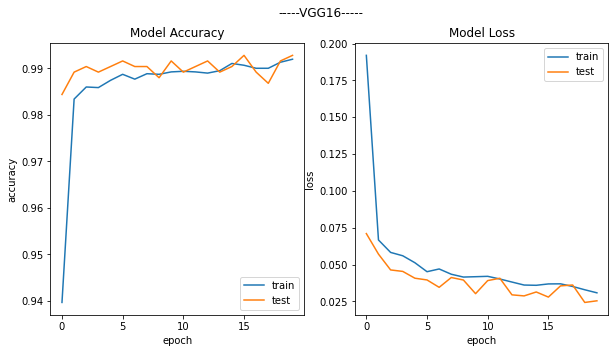

In [11]:
trainer.draw_training_history()

# Saving Trained Model

In [15]:
trainer.save_model()

Saving model
..Loading checkpoint
Checkpoint not found
..Saving tf model
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trained_models/model/assets
..TF model saved
Model saved


# Test Trained Model

In [16]:
trainer.test_model()

Testing Trained Model
              precision    recall  f1-score   support

    NON_COMP       0.99      0.97      0.98       186
        COMP       0.98      0.99      0.99       268

    accuracy                           0.98       454
   macro avg       0.99      0.98      0.98       454
weighted avg       0.98      0.98      0.98       454

Model Accuracy: 0.9846


# Evaluate Model

In [17]:
trainer.evaluate_model()

Evaluating model
TEST loss:  0.0367
TEST accuracy:  0.989


# Vizualize Model Classification

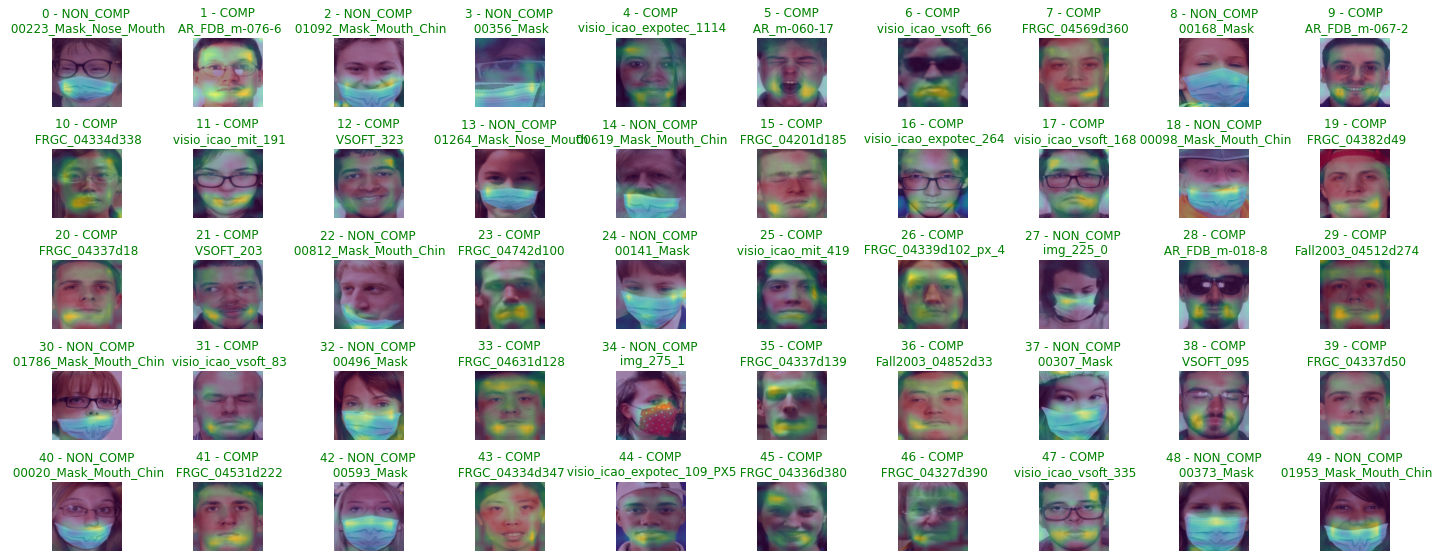

In [18]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [19]:
trainer.finish_experiment()

Not using Neptune
